In [26]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from pmdarima import auto_arima

In [2]:
!pip install pmdarima

In [37]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

# CAT DATASET

In [48]:
df = pd.read_csv('PriceIndexCatFood.csv',index_col = 'Date' , parse_dates = True )
df.index.freq = 'MS'

In [49]:
df.head()

,CatFood
Date,
1985-12-01,100.0
1986-01-01,100.0
1986-02-01,100.0
1986-03-01,100.0
1986-04-01,100.1


In [50]:
df.loc['2018-01-01':'2018-12-31']

,CatFood
Date,
2018-01-01,195.6
2018-02-01,198.7
2018-03-01,198.6
2018-04-01,198.8
2018-05-01,198.8
2018-06-01,198.8
2018-07-01,198.8
2018-08-01,198.8
2018-09-01,198.8


In [51]:
df.isna().sum()

CatFood    0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-12-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CatFood  397 non-null    float64
dtypes: float64(1)
memory usage: 26.2 KB


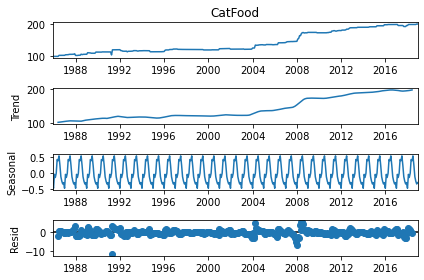

In [53]:
result = seasonal_decompose(df['CatFood'], model="add")

result.plot();

# result.seasonal.loc["1989-01-01":"1990-01-01"].plot();

In [54]:
auto_arima(df['CatFood'], seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -713.029
Date:                Mon, 01 Feb 2021   AIC                           1436.058
Time:                        11:48:24   BIC                           1455.965
Sample:                             0   HQIC                          1443.945
                                - 397                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1380      0.079      1.756      0.079      -0.016       0.292
ar.L1          0.4552      0.231      1.975      0.048       0.003       0.907
ma.L1         -0.5968      0.231     -2.582      0.010      -1.050      -0.144
ma.L2          0.2101      0.035      6.031      0.000       0.142       0.278
sigma2         2.1448      0.058     37.006      0.000       2.031       2.258
===================================================================================
Ljung-Box (Q):                       19.22   Jarque-Bera (JB):             18153.21
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             3.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
adf_test(df['CatFood'].diff(1))

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.010515e+01
p-value                 1.034639e-17
# lags used             2.000000e+00
# observations          3.930000e+02
critical value (1%)    -3.447099e+00
critical value (5%)    -2.868923e+00
critical value (10%)   -2.570703e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [56]:
stepwise_fit = auto_arima(df['CatFood'],trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1438.042, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1448.041, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1441.760, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1443.564, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1457.176, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1436.058, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1436.520, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1440.779, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1438.050, Time=0.36 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1436.835, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1436.803, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1439.909, Time=0.88 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1442.303, Time=0.09 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 2.866 seconds


In [57]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  397
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -713.029
Date:                Mon, 01 Feb 2021   AIC                           1436.058
Time:                        11:48:27   BIC                           1455.965
Sample:                             0   HQIC                          1443.945
                                - 397                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1380      0.079      1.756      0.079      -0.016       0.292
ar.L1          0.4552      0.231      1.975      0.048       0.003       0.907
ma.L1         -0.5968      0.231     -2.582      0.010      -1.050      -0.144
ma.L2          0.2101      0.035      6.031      0.000       0.142       0.278
sigma2         2.1448      0.058     37.006      0.000       2.031       2.258
===================================================================================
Ljung-Box (Q):                       19.22   Jarque-Bera (JB):             18153.21
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             3.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
len(df)

397

In [59]:
train = df.iloc[:385]
test = df.iloc[385:]

In [60]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df['CatFood'],order=(2,1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                CatFood   No. Observations:                  397
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -717.102
Date:                Mon, 01 Feb 2021   AIC                           1444.205
Time:                        11:48:27   BIC                           1464.112
Sample:                    12-01-1985   HQIC                          1452.091
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5533      0.197      2.804      0.005       0.167       0.940
ar.L2          0.0818      0.267      0.306      0.759      -0.442       0.605
ma.L1         -0.6737      0.199     -3.392      0.001      -1.063      -0.284
ma.L2          0.1490      0.274      0.544      0.586      -0.388       0.686
sigma2         2.1892      0.056     39.040      0.000       2.079       2.299
===================================================================================
Ljung-Box (Q):                       20.67   Jarque-Bera (JB):             19162.79
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             3.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,2) Predictions')

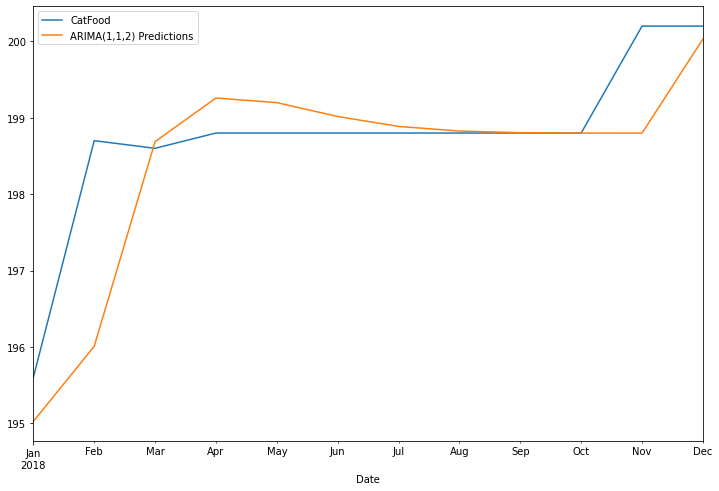

In [62]:
ax = test['CatFood'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

In [59]:
predictions.mean()

195.85151771793554

In [60]:
model = SARIMAX(df['CatFood'],order=(1,1,2))

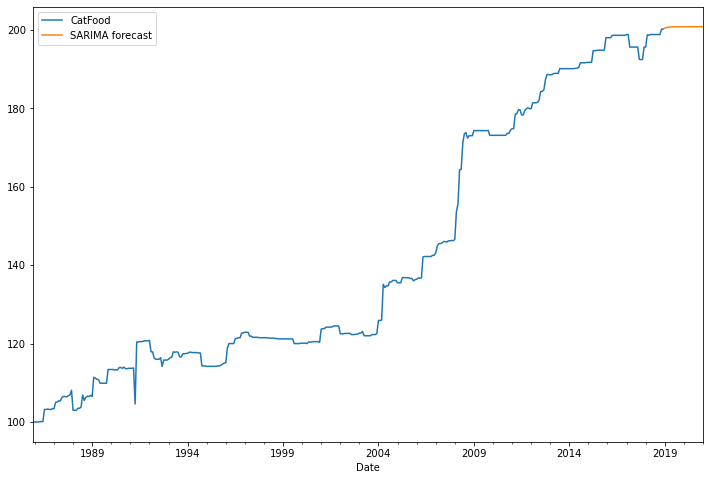

In [61]:
results = model.fit()
fcast = results.predict(len(df),len(df)+24).rename('SARIMA forecast')
df['CatFood'].plot(legend=True,figsize=[12,8])
fcast.plot(legend =True)

# Persoal Spending Dataset

In [45]:
df = pd.read_csv('PCEPersonalSpending.csv',index_col = 'Date' , parse_dates = True )
df.index.freq = 'MS'

In [68]:
df.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [46]:
df.tail()

,Spending
Date,
2015-08-01,12394.0
2015-09-01,12392.8
2015-10-01,12416.1
2015-11-01,12450.1
2015-12-01,12469.1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 1995-01-01 to 2015-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Spending  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [70]:
df.isna().sum()

Spending    0
dtype: int64

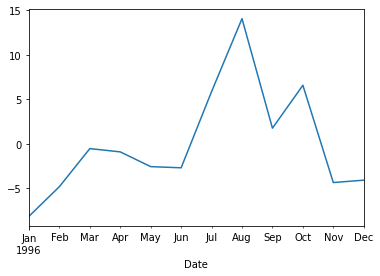

In [71]:
result = seasonal_decompose(df['Spending'], model="add")
# result.plot();
result.seasonal.loc["1996-01-01":"1996-12-31"].plot();

In [72]:
auto_arima(df['Spending'], seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1238.601
Date:                Mon, 01 Feb 2021   AIC                           2487.202
Time:                        11:51:51   BIC                           2504.829
Sample:                             0   HQIC                          2494.295
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.7303      3.530      1.907      0.057      -0.188      13.648
ar.L1          0.7772      0.120      6.458      0.000       0.541       1.013
ma.L1         -0.7887      0.117     -6.755      0.000      -1.018      -0.560
ma.L2          0.1342      0.062      2.172      0.030       0.013       0.255
sigma2      1131.1462     61.863     18.285      0.000    1009.896    1252.396
===================================================================================
Ljung-Box (Q):                       34.26   Jarque-Bera (JB):               216.20
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.30
Prob(H) (two-sided):                  0.92   Kurtosis:                         7.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
adf_test(df['Spending'].diff(1))

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [74]:
stepwise_fit = auto_arima(df['Spending'],trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2489.190, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2491.179, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2493.109, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2493.123, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2634.224, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2487.202, Time=0.48 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2490.649, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2488.774, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2489.179, Time=0.61 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2489.688, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2487.240, Time=0.37 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2496.732, Time=0.15 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 3.980 seconds


In [75]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1238.601
Date:                Mon, 01 Feb 2021   AIC                           2487.202
Time:                        11:51:56   BIC                           2504.829
Sample:                             0   HQIC                          2494.295
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.7303      3.530      1.907      0.057      -0.188      13.648
ar.L1          0.7772      0.120      6.458      0.000       0.541       1.013
ma.L1         -0.7887      0.117     -6.755      0.000      -1.018      -0.560
ma.L2          0.1342      0.062      2.172      0.030       0.013       0.255
sigma2      1131.1462     61.863     18.285      0.000    1009.896    1252.396
===================================================================================
Ljung-Box (Q):                       34.26   Jarque-Bera (JB):               216.20
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                            -0.30
Prob(H) (two-sided):                  0.92   Kurtosis:                         7.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [76]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf

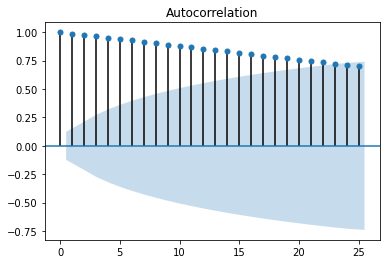

In [77]:
plot_acf(df['Spending'])
plt.show()

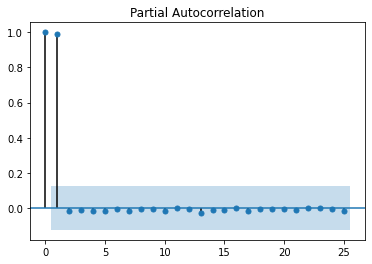

In [78]:
plot_pacf(df['Spending'])
plt.show()

In [79]:
len(df)

252

In [80]:
train = df.iloc[:240]
test = df.iloc[240:]

In [81]:
model = ARIMA(df['Spending'],order=(1,1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.Spending   No. Observations:                  251
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1238.594
Method:                       css-mle   S.D. of innovations             33.632
Date:                Mon, 01 Feb 2021   AIC                           2487.189
Time:                        11:51:56   BIC                           2504.816
Sample:                    02-01-1995   HQIC                          2494.282
                         - 12-01-2015                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               30.2212      3.274      9.231      0.000      23.805      36.638
ar.L1.D.Spending     0.7783      0.183      4.252      0.000       0.420       1.137
ma.L1.D.Spending    -0.7893      0.188     -4.208      0.000      -1.157      -0.422
ma.L2.D.Spending     0.1337      0.073      1.826      0.068      -0.010       0.277
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2848           +0.0000j            1.2848            0.0000
MA.1            1.8414           +0.0000j            1.8414            0.0000
MA.2            4.0613           +0.0000j            4.0613            0.0000
-----------------------------------------------------------------------------
"""

In [82]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,2) Predictions')

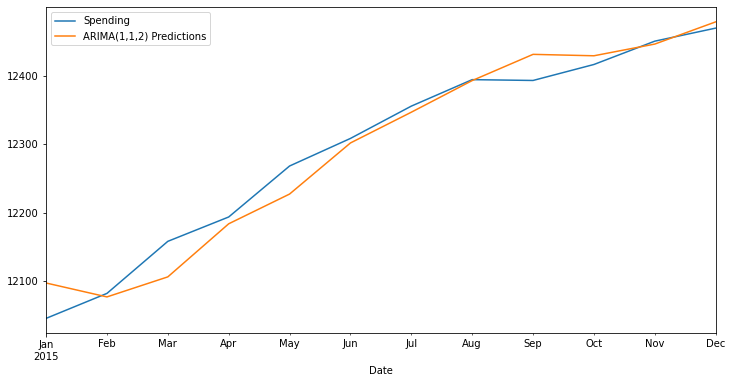

In [83]:
ax = test['Spending'].plot(legend=True,figsize=(12,6))
predictions.plot(legend=True)

# SARIMA

In [446]:
import pandas as pd
import numpy as np
%matplotlib inline


from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('co2_mm_mlo.csv')

In [330]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 2014-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  729 non-null    float64
 1   MaxTemp  729 non-null    float64
 2   AvgTemp  729 non-null    float64
 3   Sunrise  729 non-null    int64  
 4   Sunset   729 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 34.2 KB


In [331]:
df['date']=pd.to_datetime(dict(year=df['year'], month=df['month'], day=1))
df.set_index('date',inplace=True)
df.index.freq = 'MS'
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 2014-01-01 to 2015-12-31
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  729 non-null    float64
 1   MaxTemp  729 non-null    float64
 2   AvgTemp  729 non-null    float64
 3   Sunrise  729 non-null    int64  
 4   Sunset   729 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 34.2 KB


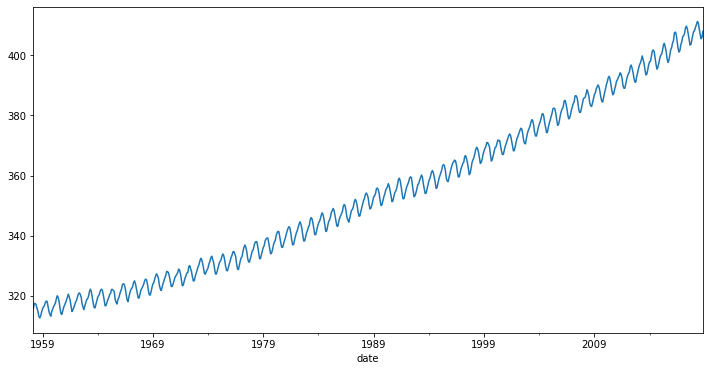

In [332]:
ax = df['interpolated'].plot(figsize=(12,6))

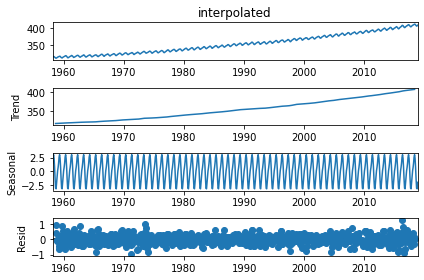

In [333]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

In [334]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.266
Date:                            Thu, 28 Jan 2021   AIC                            424.531
Time:                                    18:31:01   BIC                            452.073
Sample:                                         0   HQIC                           435.159
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3566      0.082      4.373      0.000       0.197       0.516
ar.L2          0.0892      0.036      2.511      0.012       0.020       0.159
ma.L1         -0.7109      0.070    -10.123      0.000      -0.849      -0.573
ar.S.L12       0.9996      0.000   2750.168      0.000       0.999       1.000
ma.S.L12      -0.8658      0.021    -40.321      0.000      -0.908      -0.824
sigma2         0.0958      0.005     20.696      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       43.76   Jarque-Bera (JB):                 4.40
Prob(Q):                              0.31   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [336]:
len(df)

729

In [337]:
train = df.iloc[:717]
test = df.iloc[717:]

In [338]:
model = SARIMAX(train['interpolated'],order=(0,1,3),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                         interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -201.188
Date:                              Thu, 28 Jan 2021   AIC                            414.376
Time:                                      18:32:57   BIC                            441.818
Sample:                                  03-01-1958   HQIC                           424.973
                                       - 11-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3542      0.036     -9.812      0.000      -0.425      -0.283
ma.L2         -0.0246      0.037     -0.668      0.504      -0.097       0.048
ma.L3         -0.0869      0.035     -2.492      0.013      -0.155      -0.019
ar.S.L12       0.9996      0.000   3101.557      0.000       0.999       1.000
ma.S.L12      -0.8661      0.023    -38.442      0.000      -0.910      -0.822
sigma2         0.0950      0.005     20.307      0.000       0.086       0.104
===================================================================================
Ljung-Box (Q):                       43.92   Jarque-Bera (JB):                 4.35
Prob(Q):                              0.31   Prob(JB):                         0.11
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [339]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Predictions')

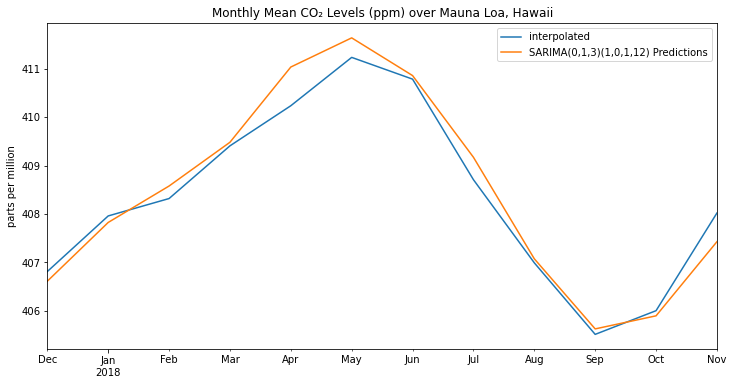

In [340]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = test['interpolated'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# MaunaLoa Daily Temperature

In [43]:
import pandas as pd
df=pd.read_csv('MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
# df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (1825, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


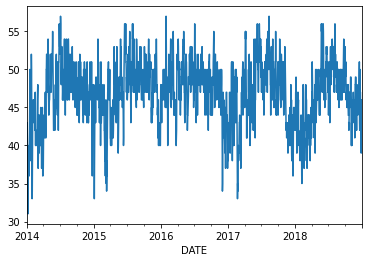

In [44]:
df['AvgTemp'].plot()

In [29]:
df.fillna(method='bfill', inplace=True)

In [30]:
df[df['AvgTemp'].isnull()]

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,


In [31]:
df['2014-05-10':'2014-05-20']['AvgTemp']

DATE
2014-05-10    49.0
2014-05-11    48.0
2014-05-12    47.0
2014-05-13    47.0
2014-05-14    48.0
2014-05-15    50.0
2014-05-16    52.0
2014-05-17    52.0
2014-05-18    52.0
2014-05-19    52.0
2014-05-20    53.0
Name: AvgTemp, dtype: float64

In [32]:
df['2016-04-15':'2016-04-25']['AvgTemp']

DATE
2016-04-15    45.0
2016-04-16    44.0
2016-04-17    45.0
2016-04-18    48.0
2016-04-19    46.0
2016-04-20    50.0
2016-04-21    50.0
2016-04-22    50.0
2016-04-23    50.0
2016-04-24    51.0
2016-04-25    48.0
Name: AvgTemp, dtype: float64

In [33]:
df['2017-04-15':'2017-04-25']['AvgTemp']

DATE
2017-04-15    43.0
2017-04-16    45.0
2017-04-17    45.0
2017-04-18    44.0
2017-04-19    44.0
2017-04-20    44.0
2017-04-21    46.0
2017-04-22    50.0
2017-04-23    47.0
2017-04-24    47.0
2017-04-25    50.0
Name: AvgTemp, dtype: float64

In [34]:
df['2018-10-15':'2018-10-25']['AvgTemp']

DATE
2018-10-15    45.0
2018-10-16    48.0
2018-10-17    45.0
2018-10-18    44.0
2018-10-19    43.0
2018-10-20    43.0
2018-10-21    42.0
2018-10-22    44.0
2018-10-23    45.0
2018-10-24    47.0
2018-10-25    47.0
Name: AvgTemp, dtype: float64

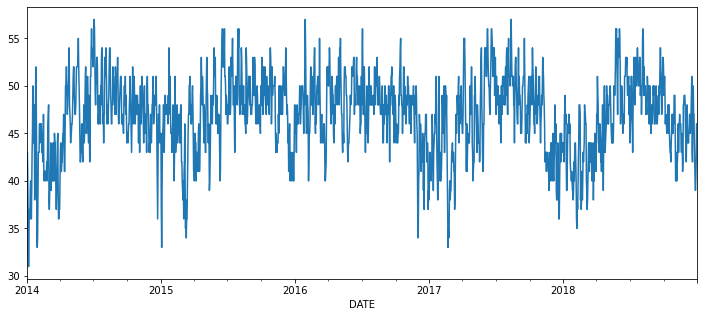

In [35]:
df['AvgTemp'].plot(figsize=(12,5))

In [38]:
adf_test(df['AvgTemp'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -6.596797e+00
p-value                 6.893095e-09
# lags used             1.200000e+01
# observations          1.812000e+03
critical value (1%)    -3.433964e+00
critical value (5%)    -2.863136e+00
critical value (10%)   -2.567620e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [39]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8357.848, Time=2.84 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10369.944, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8380.411, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9156.143, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19234.361, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8370.749, Time=1.96 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8371.100, Time=2.68 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8361.928, Time=3.17 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8335.785, Time=3.43 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8344.746, Time=2.92 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8328.196, Time=4.03 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8344.814, Time=4.23 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8333.266, Time=4.89 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8322.991, Time=4.17 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [40]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1825, 5)
(1795, 5) (30, 5)


In [41]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

C:\Users\Nabeel Zafar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1825
Model:                     ARMA(1, 5)   Log Likelihood               -4145.484
Method:                       css-mle   S.D. of innovations              2.345
Date:                Mon, 01 Feb 2021   AIC                           8306.968
Time:                        15:49:04   BIC                           8351.043
Sample:                    01-01-2014   HQIC                          8323.226
                         - 12-30-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5303      0.787     59.135      0.000      44.988      48.072
ar.L1.AvgTemp     0.9861      0.006    155.857      0.000       0.974       0.998
ma.L1.AvgTemp    -0.1400      0.024     -5.753      0.000      -0.188      -0.092
ma.L2.AvgTemp    -0.2312      0.024     -9.580      0.000      -0.278      -0.184
ma.L3.AvgTemp    -0.2159      0.025     -8.574      0.000      -0.265      -0.167
ma.L4.AvgTemp    -0.1459      0.023     -6.233      0.000      -0.192      -0.100
ma.L5.AvgTemp    -0.0633      0.024     -2.598      0.009      -0.111      -0.016
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0141           +0.0000j            1.0141            0.0000
MA.1            1.0860           -0.0000j            1.0860           -0.0000
MA.2            0.0825           -1.8398j            1.8417           -0.2429
MA.3            0.0825           +1.8398j            1.8417            0.2429
MA.4           -1.7778           -1.0612j            2.0704           -0.4143
MA.5           -1.7778           +1.0612j            2.0704            0.4143
-----------------------------------------------------------------------------
"""

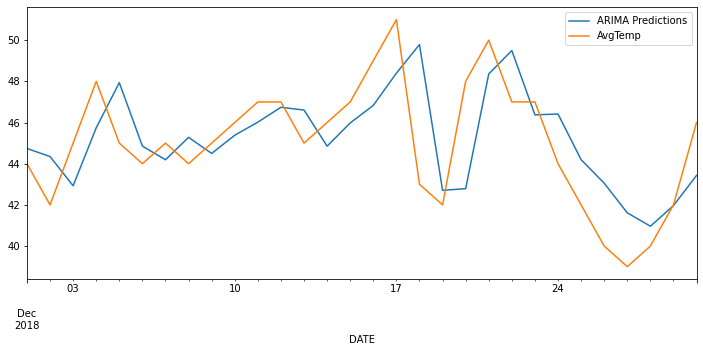

In [42]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
# pred.head()
ax = test['AvgTemp'].plot(legend=True, figsize=(12,5))

# Energy Production

In [21]:
import pandas as pd
df=pd.read_csv('EnergyProduction.csv',index_col='DATE',parse_dates=True)
df=df.dropna()
df = df.asfreq('MS')
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


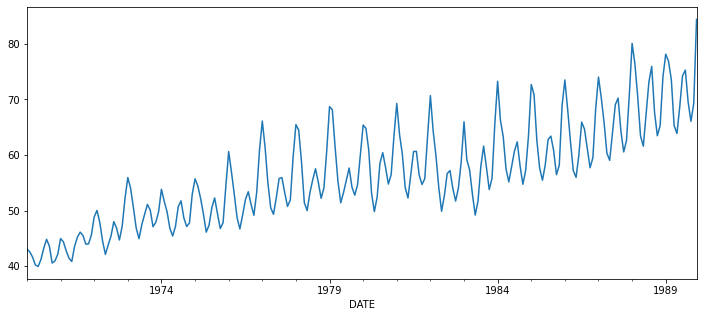

In [22]:
df['EnergyIndex'].plot(figsize=(12,5))

In [23]:
result = seasonal_decompose(df['EnergyIndex'], model="add")
result.plot();

NameError: name 'seasonal_decompose' is not defined

In [24]:
auto_arima(df['EnergyIndex'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  240
Model:             SARIMAX(3, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -413.258
Date:                            Mon, 01 Feb 2021   AIC                            840.516
Time:                                    15:45:38   BIC                            864.522
Sample:                                         0   HQIC                           850.202
                                            - 240                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0475      0.046      1.044      0.296      -0.042       0.137
ar.L1          1.6309      0.166      9.803      0.000       1.305       1.957
ar.L2         -0.8739      0.155     -5.641      0.000      -1.178      -0.570
ar.L3          0.2156      0.091      2.376      0.018       0.038       0.394
ma.L1         -0.7386      0.174     -4.249      0.000      -1.079      -0.398
ma.S.L12      -0.5457      0.059     -9.261      0.000      -0.661      -0.430
sigma2         2.1500      0.148     14.511      0.000       1.860       2.440
===================================================================================
Ljung-Box (Q):                       25.05   Jarque-Bera (JB):                64.01
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               2.07   Skew:                             0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
adf_test(df['EnergyIndex'].diff(1))

NameError: name 'adf_test' is not defined

In [ ]:
from pmdarima import auto_arima
auto_arima(df['EnergyIndex'],seasonal=True,m=12)

In [ ]:
len(df)

In [ ]:
print(df.shape)
train=df.iloc[:220]
test=df.iloc[220:]
print(train.shape,test.shape)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['EnergyIndex'],order=(3, 0, 1),seasonal_order=(0, 1, 1, 12))
model=model.fit()
model.summary()

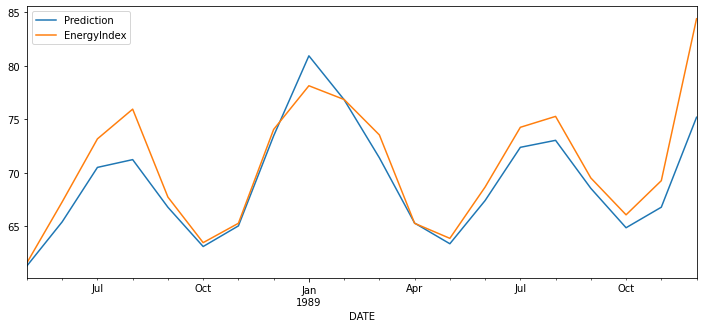

In [466]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename("Prediction")
pred.plot(legend=True)
ax = test['EnergyIndex'].plot(legend=True, figsize=(12,5))